In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#setting seaborn style
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('mdc.csv', encoding='latin-1', index_col=0)

In [4]:
df.head()

,title,year,genre,runtime,mpa_rating,imdb_rating,imdb_votes,imdb_gross,director,stars,description,crit_consensus,tomato_meter,tomato_review,tom_aud_score,tom_ratings,entity,id
1,Captain America,1944,"Action, Adventure, Sci-Fi",244,Approved,5.5,844,0,Elmer Clifton,"Elmer Clifton,Dick Purcell,Lorna Gray,Lionel A...",Superhero Captain America battles the evil for...,"Find one of these old serials, friend. They're...",0,1,82,250,MARVEL,1
2,Howard the Duck,1986,"Action, Adventure, Comedy",110,PG,4.7,44073,16300000,Willard Huyck,"Willard Huyck,Lea Thompson,Jeffrey Jones,Tim R...",A sarcastic humanoid duck is pulled from his h...,"While it has its moments, Howard the Duck suff...",13,78,38,50000,MARVEL,2
3,Blade,1998,"Action, Horror, Sci-Fi",120,R,7.1,251243,70090000,Stephen Norrington,"Stephen Norrington,Wesley Snipes,Stephen Dorff...","A half-vampire, half-mortal man becomes a prot...","Though some may find the plot a bit lacking, B...",55,103,78,250000,MARVEL,3
4,X-Men,2000,"Action, Adventure, Sci-Fi",104,PG-13,7.4,580354,157300000,Bryan Singer,"Bryan Singer,Patrick Stewart,Hugh Jackman,Ian ...",In a world where mutants (evolved super-powere...,"Faithful to the comics and filled with action,...",82,174,83,250000,MARVEL,4
5,Blade II,2002,"Action, Fantasy, Horror",117,R,6.7,203813,82350000,Guillermo del Toro,"Guillermo del Toro,Wesley Snipes,Kris Kristoff...",Blade forms an uneasy alliance with the vampir...,Though Blade II offers more of what worked in ...,57,150,68,250000,MARVEL,5


In [5]:
df.columns

Index(['title', 'year', 'genre', 'runtime', 'mpa_rating', 'imdb_rating',
       'imdb_votes', 'imdb_gross', 'director', 'stars', 'description',
       'crit_consensus', 'tomato_meter', 'tomato_review', 'tom_aud_score',
       'tom_ratings', 'entity', 'id'],
      dtype='object')

In [6]:
len(df.columns)

18

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 90
Data columns (total 18 columns):
title             90 non-null object
year              90 non-null int64
genre             90 non-null object
runtime           90 non-null int64
mpa_rating        90 non-null object
imdb_rating       90 non-null float64
imdb_votes        90 non-null int64
imdb_gross        90 non-null int64
director          90 non-null object
stars             90 non-null object
description       90 non-null object
crit_consensus    90 non-null object
tomato_meter      90 non-null int64
tomato_review     90 non-null int64
tom_aud_score     90 non-null int64
tom_ratings       90 non-null int64
entity            90 non-null object
id                90 non-null int64
dtypes: float64(1), int64(9), object(8)
memory usage: 13.4+ KB


In [8]:
df.describe()

,year,runtime,imdb_rating,imdb_votes,imdb_gross,tomato_meter,tomato_review,tom_aud_score,tom_ratings,id
count,90.000000,90.000000,90.000000,9.000000e+01,9.000000e+01,90.000000,90.000000,90.000000,90.000000,90.000000
mean,2006.377778,124.144444,6.552222,4.652830e+05,2.123682e+08,59.900000,266.966667,66.733333,150311.111111,45.500000
std,14.335920,23.522192,1.271576,3.834906e+05,1.737576e+08,29.439731,144.250597,22.646179,98166.343799,26.124701
min,1944.000000,58.000000,2.900000,8.440000e+02,0.000000e+00,0.000000,1.000000,15.000000,250.000000,1.000000
25%,2003.250000,110.500000,5.700000,1.910570e+05,7.757250e+07,31.250000,156.250000,55.250000,50000.000000,23.250000
50%,2011.000000,124.000000,6.900000,4.212640e+05,1.806150e+08,67.500000,277.500000,73.500000,100000.000000,45.500000
75%,2016.000000,136.000000,7.400000,6.548668e+05,3.249725e+08,85.750000,377.250000,85.000000,250000.000000,67.750000
max,2020.000000,244.000000,9.000000,2.369304e+06,8.583700e+08,96.000000,585.000000,95.000000,250000.000000,90.000000


In [9]:
df.isna().sum()

title             0
year              0
genre             0
runtime           0
mpa_rating        0
imdb_rating       0
imdb_votes        0
imdb_gross        0
director          0
stars             0
description       0
crit_consensus    0
tomato_meter      0
tomato_review     0
tom_aud_score     0
tom_ratings       0
entity            0
id                0
dtype: int64

In [10]:
df['genre'].unique()

array(['Action, Adventure, Sci-Fi', 'Action, Adventure, Comedy',
       'Action, Horror, Sci-Fi', 'Action, Fantasy, Horror',
       'Action, Crime', 'Action, Sci-Fi, Thriller', 'Action, Sci-Fi',
       'Action, Crime, Drama', 'Action, Adventure, Fantasy',
       'Action, Adventure, Crime', 'Action, Fantasy, Thriller',
       'Action, Drama, Sci-Fi', 'Action, Adventure, Drama',
       'Action, Horror, Mystery', 'Adventure, Comedy, Crime',
       'Horror, Sci-Fi', 'Action, Adventure', 'Action, Crime, Fantasy',
       'Action, Drama, Mystery', 'Action, Drama, Fantasy',
       'Crime, Drama, Thriller'], dtype=object)

In [11]:
genre_count = df['genre'].value_counts()

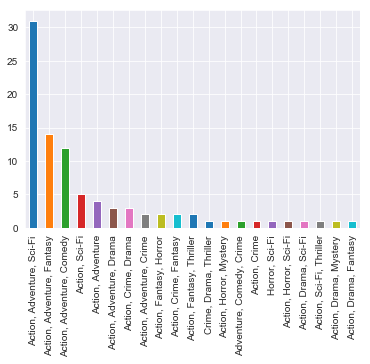

In [12]:
#most common genre

genre_count.plot(kind='bar')

In [13]:
#most common genre entitywise

grp_entity = df.groupby('entity')
grp_entity['genre'].value_counts()

entity  genre                     
DC      Action, Adventure, Fantasy     6
        Action, Adventure, Sci-Fi      5
        Action, Adventure              4
        Action, Adventure, Comedy      4
        Action, Adventure, Drama       2
        Action, Crime, Fantasy         2
        Action, Sci-Fi                 2
        Action, Adventure, Crime       1
        Action, Crime, Drama           1
        Action, Drama, Fantasy         1
        Action, Drama, Mystery         1
        Action, Fantasy, Horror        1
        Adventure, Comedy, Crime       1
        Crime, Drama, Thriller         1
        Horror, Sci-Fi                 1
MARVEL  Action, Adventure, Sci-Fi     26
        Action, Adventure, Comedy      8
        Action, Adventure, Fantasy     8
        Action, Sci-Fi                 3
        Action, Crime, Drama           2
        Action, Fantasy, Thriller      2
        Action, Adventure, Crime       1
        Action, Adventure, Drama       1
        Action, Crime 

In [14]:
grp_entity.median()

,year,runtime,imdb_rating,imdb_votes,imdb_gross,tomato_meter,tomato_review,tom_aud_score,tom_ratings,id
entity,,,,,,,,,,
DC,2005,125,6.1,270939,116600000,59,230,71,100000,74
MARVEL,2012,123,7.0,510723,213520000,76,291,76,250000,29


entity
DC        AxesSubplot(0.125,0.125;0.775x0.755)
MARVEL    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

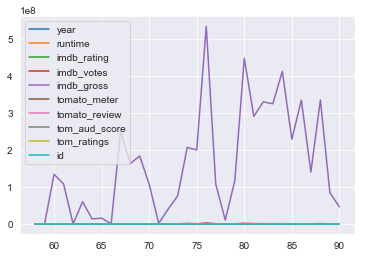

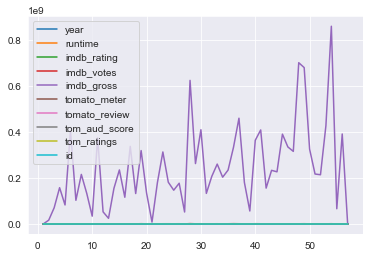

In [15]:
grp_entity.plot()

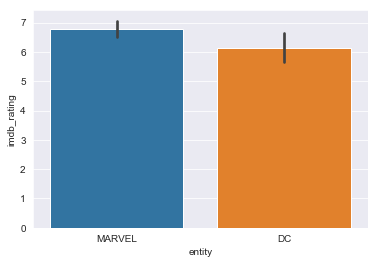

In [16]:
sns.barplot(x='entity', y='imdb_rating', data=df)

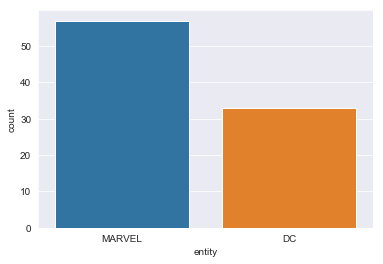

In [17]:
sns.countplot(x='entity', data=df)

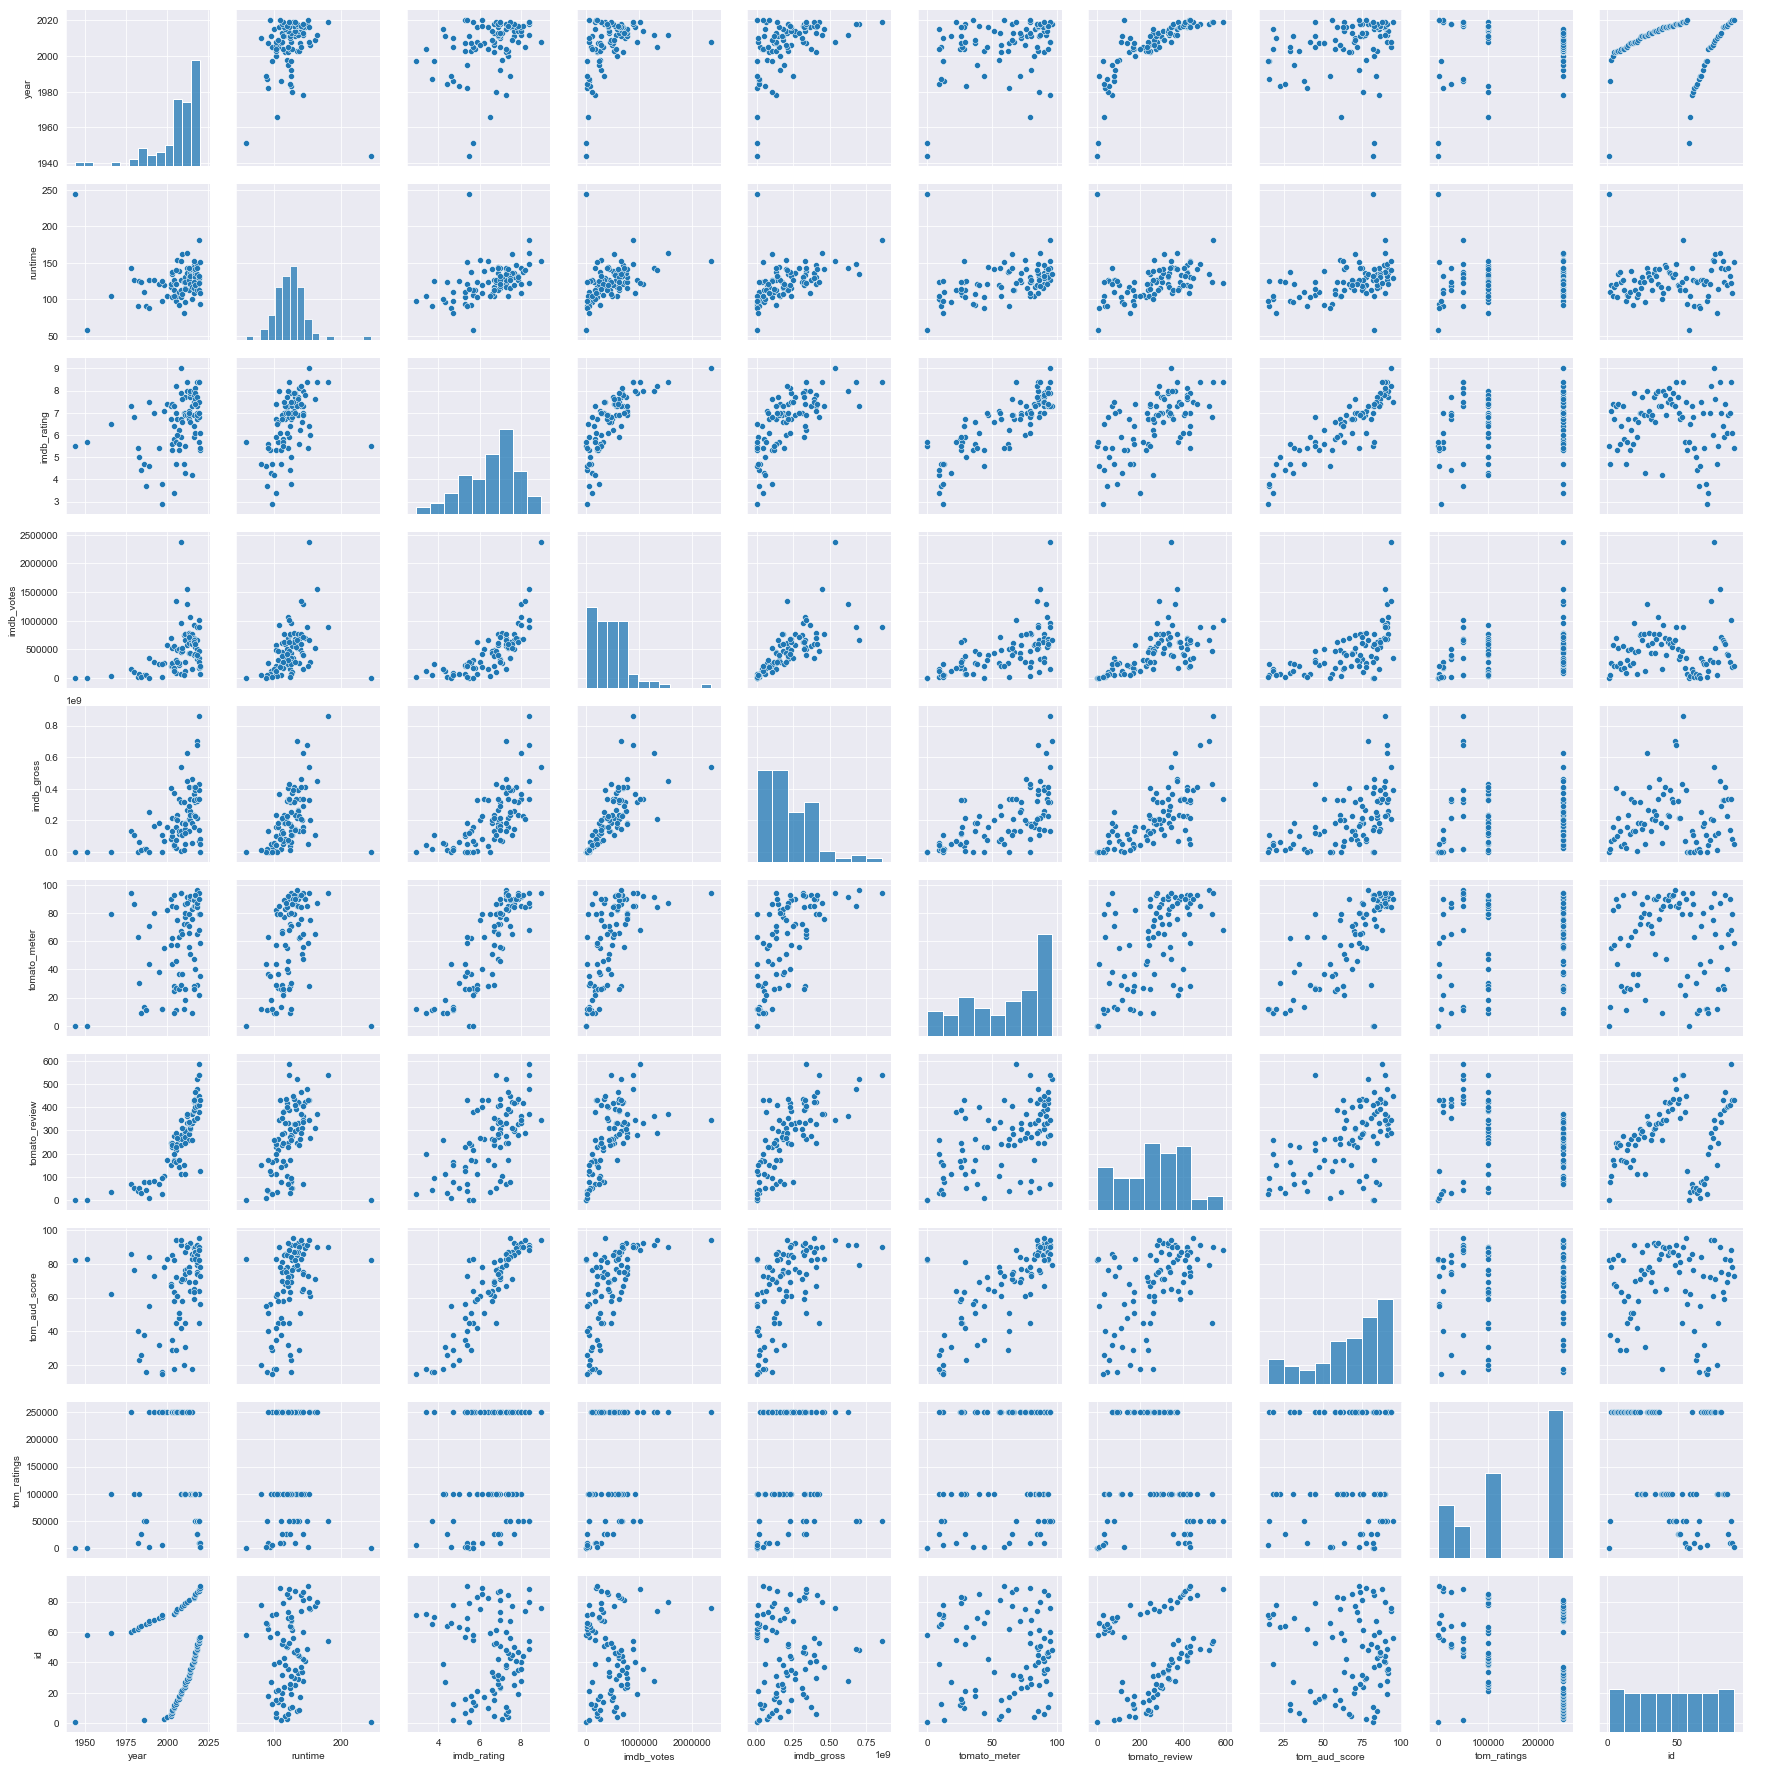

In [18]:
sns.pairplot(data=df)

In [19]:
#highest imdb ratings

df.nlargest(2, ['imdb_rating'])

,title,year,genre,runtime,mpa_rating,imdb_rating,imdb_votes,imdb_gross,director,stars,description,crit_consensus,tomato_meter,tomato_review,tom_aud_score,tom_ratings,entity,id
76,The Dark Knight,2008,"Action, Crime, Drama",152,PG-13,9.0,2369304,534860000,Christopher Nolan,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",When the menace known as the Joker wreaks havo...,"Dark, complex, and unforgettable, The Dark Kni...",94,344,94,250000,DC,76
49,Avengers: Infinity War,2018,"Action, Adventure, Sci-Fi",149,PG-13,8.4,888104,678820000,Anthony Russo,"Joe Russo,Robert Downey Jr.,Chris Hemsworth,Ma...",The Avengers and their allies must be willing ...,Avengers: Infinity War ably juggles a dizzying...,85,480,91,50000,MARVEL,49


In [20]:
#median duration genrewise 

grp_genre = df.groupby('genre')
grp_genre.median()['runtime'].sort_values(ascending=False)[:5]

genre
Action, Drama, Mystery      162.0
Action, Adventure, Drama    143.0
Action, Drama, Sci-Fi       137.0
Action, Sci-Fi, Thriller    134.0
Action, Adventure           133.0
Name: runtime, dtype: float64

In [21]:
#Most common genre yearwise

grp_year = df.groupby('year')
grp_year['genre'].value_counts()[55:]

year  genre                     
2015  Action, Adventure, Comedy     1
2016  Action, Adventure, Sci-Fi     3
      Action, Adventure, Fantasy    2
      Action, Adventure, Comedy     1
2017  Action, Adventure, Comedy     2
      Action, Adventure, Fantasy    2
      Action, Adventure, Sci-Fi     1
      Action, Drama, Sci-Fi         1
2018  Action, Adventure, Sci-Fi     3
      Action, Adventure, Comedy     2
      Action, Adventure, Fantasy    1
2019  Action, Adventure, Sci-Fi     3
      Action, Adventure, Comedy     1
      Action, Adventure, Drama      1
      Crime, Drama, Thriller        1
2020  Action, Adventure, Comedy     1
      Action, Adventure, Fantasy    1
      Action, Horror, Mystery       1
Name: genre, dtype: int64

In [22]:
grp_genre.median()['imdb_rating'].sort_values(ascending=False)[:5]

genre
Crime, Drama, Thriller      8.40
Action, Drama, Sci-Fi       8.10
Action, Adventure           7.85
Action, Drama, Mystery      7.60
Action, Sci-Fi, Thriller    7.40
Name: imdb_rating, dtype: float64

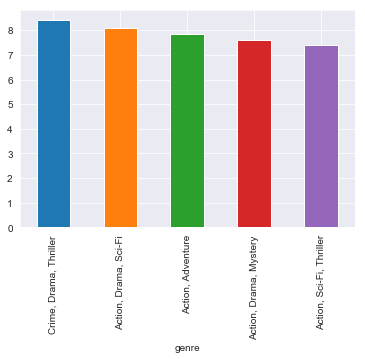

In [23]:
grp_genre.median()['imdb_rating'].sort_values(ascending=False)[:5].plot(kind='bar')

In [24]:
#median imdb rating of "Action, Adventure, Sci-Fi" genre (because its the most common genre)

grp_genre.median()['imdb_rating'].loc['Action, Adventure, Sci-Fi']

7.0

In [25]:
#top10 imdb ratings grouped by entity and genre

grp_two = df.groupby(['genre', 'entity'])
grp_two.median()['imdb_rating'].sort_values(ascending=False)[:10]

genre                      entity
Action, Crime, Drama       DC        9.00
Crime, Drama, Thriller     DC        8.40
Action, Adventure, Drama   MARVEL    8.40
Action, Drama, Sci-Fi      MARVEL    8.10
Action, Adventure          DC        7.85
Action, Adventure, Comedy  MARVEL    7.65
Action, Drama, Mystery     DC        7.60
Action, Sci-Fi, Thriller   MARVEL    7.40
Action, Adventure, Sci-Fi  MARVEL    7.30
Action, Horror, Sci-Fi     MARVEL    7.10
Name: imdb_rating, dtype: float64

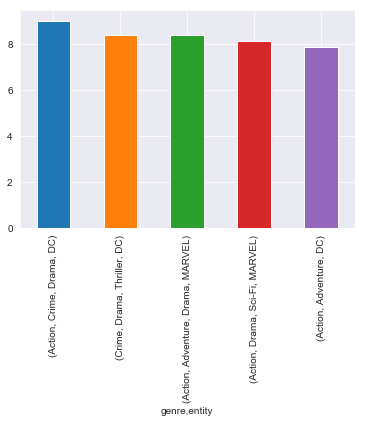

In [26]:
grp_two.median()['imdb_rating'].sort_values(ascending=False)[:5].plot(kind='bar')

# Linear Regression

In [27]:
y = np.array(df['imdb_rating']).reshape(-1, 1)
X = np.array(df['imdb_gross']).reshape(-1, 1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [29]:
lreg = LinearRegression()

In [30]:
lreg.fit(X_train, y_train)

LinearRegression()

In [31]:
p = lreg.predict(X_test)

In [32]:
print(lreg.score(X_test, y_test))

0.3973150800537628


In [33]:
df_p = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': p.flatten()})
df_p.head()

,Actual,Predicted
0,6.8,7.583707
1,6.6,6.456363
2,4.6,5.436328
3,6.2,7.129206
4,7.3,7.467339


In [34]:
mean_squared_error(y_test, p)

0.8620103291677164

# Decision Tree Classifier

In [35]:
dummy = pd.get_dummies(df['entity'])

In [36]:
dummy.head()

,DC,MARVEL
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1


In [37]:
df2 = pd.concat((df, dummy), axis=1)

In [38]:
df2 = df2.drop('MARVEL', axis=1)

In [39]:
#universe: 0 is marvel, 1 is DC
df2 = df2.rename(columns={'DC': 'uni'})

In [40]:
df2.head()

,title,year,genre,runtime,mpa_rating,imdb_rating,imdb_votes,imdb_gross,director,stars,description,crit_consensus,tomato_meter,tomato_review,tom_aud_score,tom_ratings,entity,id,uni
1,Captain America,1944,"Action, Adventure, Sci-Fi",244,Approved,5.5,844,0,Elmer Clifton,"Elmer Clifton,Dick Purcell,Lorna Gray,Lionel A...",Superhero Captain America battles the evil for...,"Find one of these old serials, friend. They're...",0,1,82,250,MARVEL,1,0
2,Howard the Duck,1986,"Action, Adventure, Comedy",110,PG,4.7,44073,16300000,Willard Huyck,"Willard Huyck,Lea Thompson,Jeffrey Jones,Tim R...",A sarcastic humanoid duck is pulled from his h...,"While it has its moments, Howard the Duck suff...",13,78,38,50000,MARVEL,2,0
3,Blade,1998,"Action, Horror, Sci-Fi",120,R,7.1,251243,70090000,Stephen Norrington,"Stephen Norrington,Wesley Snipes,Stephen Dorff...","A half-vampire, half-mortal man becomes a prot...","Though some may find the plot a bit lacking, B...",55,103,78,250000,MARVEL,3,0
4,X-Men,2000,"Action, Adventure, Sci-Fi",104,PG-13,7.4,580354,157300000,Bryan Singer,"Bryan Singer,Patrick Stewart,Hugh Jackman,Ian ...",In a world where mutants (evolved super-powere...,"Faithful to the comics and filled with action,...",82,174,83,250000,MARVEL,4,0
5,Blade II,2002,"Action, Fantasy, Horror",117,R,6.7,203813,82350000,Guillermo del Toro,"Guillermo del Toro,Wesley Snipes,Kris Kristoff...",Blade forms an uneasy alliance with the vampir...,Though Blade II offers more of what worked in ...,57,150,68,250000,MARVEL,5,0


In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
X = np.array(df2['imdb_rating']).reshape(-1, 1)
#universe: 0 is marvel, 1 is DC
y = np.array(df2['uni']).reshape(-1, 1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [44]:
dtc = DecisionTreeClassifier()

In [45]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
y_pred = dtc.predict(X_test)

In [47]:
ans = pd.DataFrame({'predicted': y_pred.flatten(), 'actual': y_test.flatten()})
ans.head()

,predicted,actual
0,0,1
1,0,1
2,1,0
3,0,0
4,0,1


In [48]:
dtc.score(X_test, y_test)

0.7391304347826086

# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [50]:
X = np.array(df2['imdb_rating']).reshape(-1, 1)
#universe: 0 is marvel, 1 is DC
y = np.array(df2['uni']).reshape(-1, 1)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [52]:
logistic_reg = LogisticRegression()

In [53]:
logistic_reg.fit(X_train, y_train)

C:\Users\dell-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [54]:
y_pred = logistic_reg.predict(X_test)

In [70]:
prediction = pd.DataFrame({'predicted': y_pred.flatten(), 'actual': y_test.flatten()})
prediction.head()

,predicted,actual
0,0,1
1,0,1
2,0,0
3,1,0
4,0,1


In [56]:
score = logistic_reg.score(X_test, y_test)

In [57]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[13,  0],
       [ 9,  1]], dtype=int64)

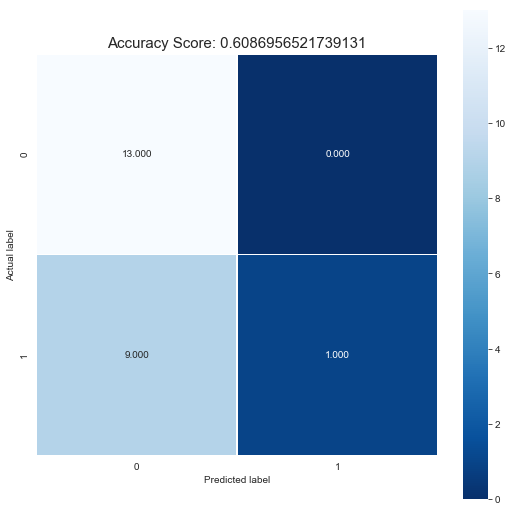

In [58]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
X = np.array(df2['imdb_rating']).reshape(-1, 1)
#universe: 0 is marvel, 1 is DC
y = np.array(df2['uni']).reshape(-1, 1)

In [61]:
knn = KNeighborsClassifier()

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [63]:
knn.fit(X_train, y_train)

C:\Users\dell-pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier()

In [64]:
y_pred = knn.predict(X_test)

In [65]:
prediction = pd.DataFrame({'predicted': y_pred.flatten(), 'actual': y_test.flatten()})

In [66]:
prediction.head()

,predicted,actual
0,0,1
1,0,1
2,0,0
3,1,0
4,0,1


In [67]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[10,  3],
       [ 8,  2]], dtype=int64)

In [68]:
score = knn.score(X_test, y_test)

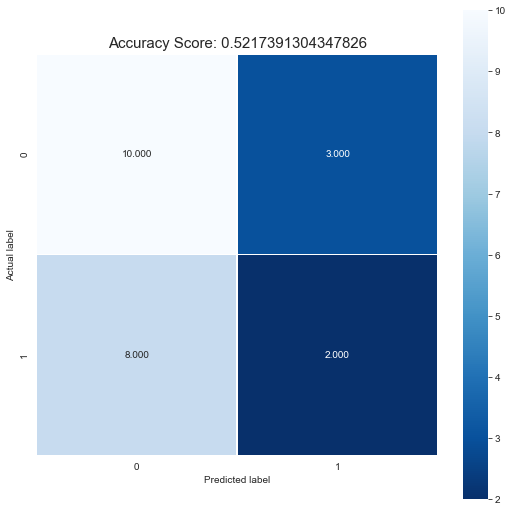

In [69]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);